In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

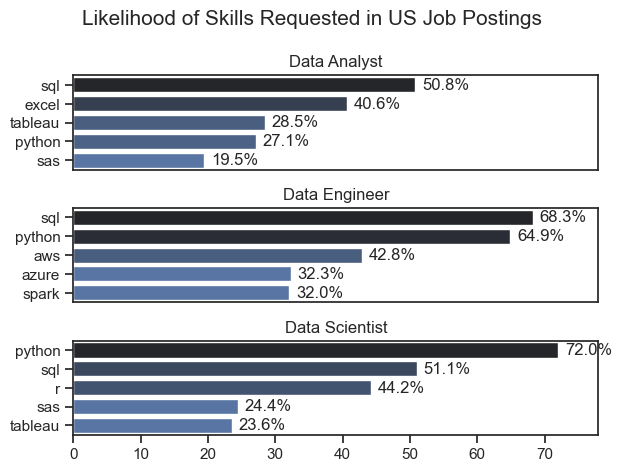

In [132]:
df_US = df[df['job_country'] == 'United States'].copy()
df_skills = df_US.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

df_title_cnt = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skills_pct = pd.merge(df_skills_count, df_title_cnt, how='left', on='job_title_short')
df_skills_pct['skill_pct'] = 100 * (df_skills_pct['skill_count'] / df_skills_pct['jobs_total'])

sns.set_theme(style='ticks')

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_pct[df_skills_pct['job_title_short'] == job_title].head()
    sns.barplot(data=df_plot, x='skill_pct', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', legend=False)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 78)
    ax[i].set_title(job_title)

    for n, v in enumerate(df_plot['skill_pct']):
        ax[i].text(v + 1, n, f'{v:.1f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout()
plt.show()